# A Handwritten Digits Classifier

In this project we evaluate the effeciveness of **Deep Feedforward Neural Networks** for classifying images. The data set we will be using is pre-loaded in the SciKit Learn library.

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.simplefilter(action='ignore')

## Exploring the Data set

In [4]:
from sklearn.datasets import load_digits

images, digits = load_digits(return_X_y=True, as_frame=True)
images.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (8 x 8 pixels). To visualize the image, we need to reshape these pixel values back into the 8 by 8 and plot them on a coordinate grid.

Let's visualize some of the images in the dataset.

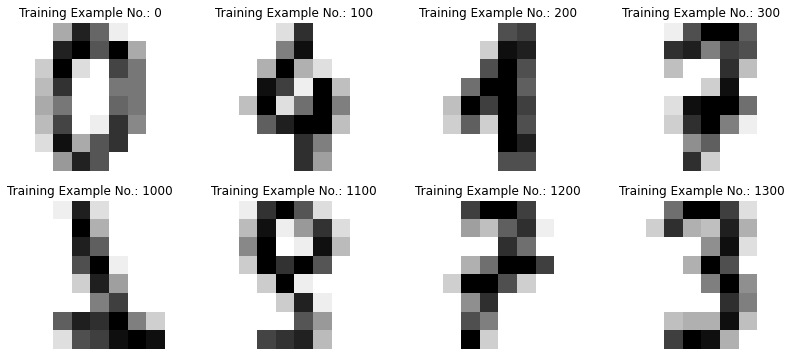

In [5]:
examples = [0, 100, 200, 300, 1000, 1100, 1200, 1300]

fig = plt.figure(figsize=(14, 6))

for i, ex in enumerate(examples):
    ax = fig.add_subplot(2, 4, i+1)
    
    #  To reshape the image, we need to convert a training example to a  
    #  numpy array and pass the result into the numpy.reshape() function.
    
    img_matrix = images.iloc[ex].values.reshape(8, 8)
    ax.imshow(img_matrix, cmap='gray_r')
    ax.set_title('Training Example No.: {}'.format(ex), size=12)
    ax.axis('off')

## Deep Feedforward Neural Network

Let's implement a **Deep Feedforward Neural Network** using the `MLPClassifier`package from SciKit Learn.

### Neural Network with 1 Hidden Layer

In [6]:
def train_and_test(img_fts, img_labels, hidden_layer_tup):
    # KFold Object instantiation
    kf = KFold(4, shuffle=True, random_state=1)
    
    train_acc_scores = list()
    test_acc_scores = list()
    
    for train_index, test_index in kf.split(img_fts):
        # Training Set
        X_train, class_train = img_fts.iloc[train_index], img_labels.iloc[train_index]
        
        # Testing Set
        X_test, class_test = img_fts.iloc[test_index], img_labels[test_index]
        
        # Training Neural Network Model
        nn_model = MLPClassifier(hidden_layer_sizes=hidden_layer_tup, activation='relu', max_iter=1000, random_state=1)    
        nn_model.fit(X_train, class_train)
    
        # Predicting and Testing
        
        ## On Training Set
        predictn_train = nn_model.predict(X_train)
        acc_train = accuracy_score(class_train, predictn_train)
        train_acc_scores.append(acc_train)
        
        ## On Testing Set
        predictn_test = nn_model.predict(X_test)
        acc_test = accuracy_score(class_test, predictn_test)
        test_acc_scores.append(acc_test)
        
    mean_train_score = np.mean(train_acc_scores)
    mean_test_score = np.mean(test_acc_scores)
    
    return mean_train_score, mean_test_score

# Using 4-fold cross validation, let's train and test a neural network 
# model using a single hidden layer of 8, 16, 32, 64, 128 or 256 neurons.

neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]

train_scores = list()
test_scores = list()

for num in neurons:
    train_score, test_score = train_and_test(images, digits, num)
    train_scores.append(train_score)
    test_scores.append(test_score)

In [7]:
print(train_scores)
print(test_scores)

[0.9964757103928061, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.924868844345459, 0.9549232863152685, 0.960486265775798, 0.9688369215540708, 0.9727295223954467, 0.9732838406335066]


Let's visualize the train and test scores.

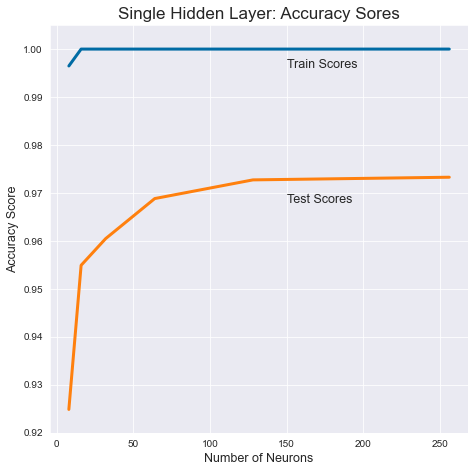

In [10]:
neuron_plt = [8, 16, 32, 64, 128, 256]

sns.set_style('darkgrid')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax = sns.lineplot(x=neuron_plt, y=train_scores, c=cb_dark_blue, linewidth=3)
ax = sns.lineplot(x=neuron_plt, y=test_scores, c=cb_orange, linewidth=3)
ax.text(150, 0.996, 'Train Scores', size=12.5)
ax.text(150, 0.968, 'Test Scores', size=12.5)
ax.set_ylim(bottom=0.92, top=1.005)
ax.set_xlabel('Number of Neurons', size = 12.5)
ax.set_ylabel('Accuracy Score', size=12.5)
ax.set_title('Single Hidden Layer: Accuracy Sores', size=17)
plt.show()

Adding more neurons to a single hidden layer vastly improved the classification accuracy. The accuracy in the training set hits 1 rapidly, meanwhile the test accuracy starts to increase with each neuron and we increase the accuracy from 0.92 to 0.97 (approximately).

### Neural Network with 2 Hidden Layers

Let's try using two hidden layers and continue to increase the number of neurons in each layer.

In [8]:
neurons_2 = [
    (64, 64),
    (128, 128),
    (256, 256)
]

train_scores_2 = list()
test_scores_2 = list()

for num in neurons_2:
    train_score, test_score = train_and_test(images, digits, num)
    train_scores_2.append(train_score)
    test_scores_2.append(test_score)

Let's visualize the train and test scores.

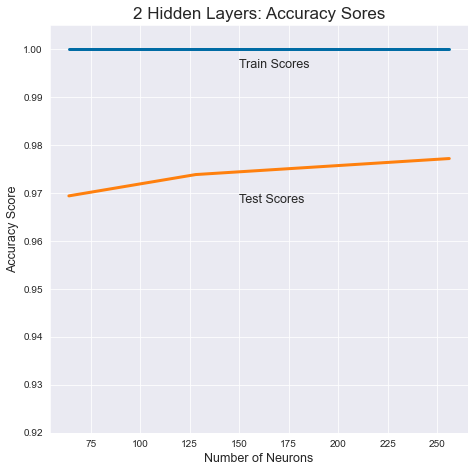

In [11]:
neurons_plt_2 = [64, 128, 256]    

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax = sns.lineplot(x=neurons_plt_2, y=train_scores_2, c=cb_dark_blue, linewidth=3)
ax = sns.lineplot(x=neurons_plt_2, y=test_scores_2, c=cb_orange, linewidth=3)
ax.text(150, 0.996, 'Train Scores', size=12.5)
ax.text(150, 0.968, 'Test Scores', size=12.5)
ax.set_ylim(bottom=0.92, top=1.005)
ax.set_xlabel('Number of Neurons', size = 12.5)
ax.set_ylabel('Accuracy Score', size=12.5)
ax.set_title('2 Hidden Layers: Accuracy Sores', size=17)
plt.show()

The difference in accuracy scores of the train and test sets reduces, hence we can conclude that overfitting reduces as we increase the number of neurons.

### Neural Network with 3 Hidden Layers

In [8]:
neurons_3 = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

train_scores_3 = list()
test_scores_3 = list()

for num in neurons_3:
    train_score, test_score = train_and_test(images, digits, num)
    train_scores_3.append(train_score)
    test_scores_3.append(test_score)

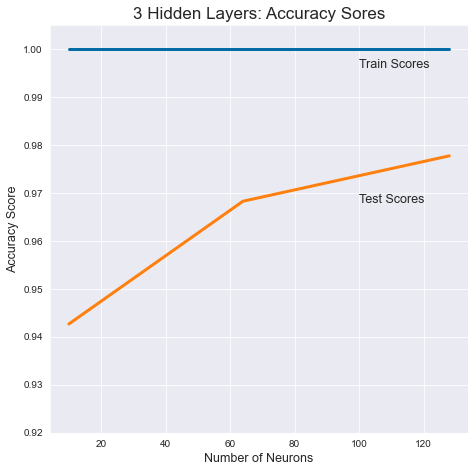

In [9]:
neurons_plt_3 = [10, 64, 128]    

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax = sns.lineplot(x=neurons_plt_3, y=train_scores_3, c=cb_dark_blue, linewidth=3)
ax = sns.lineplot(x=neurons_plt_3, y=test_scores_3, c=cb_orange, linewidth=3)
ax.text(100, 0.996, 'Train Scores', size=12.5)
ax.text(100, 0.968, 'Test Scores', size=12.5)
ax.set_ylim(bottom=0.92, top=1.005)
ax.set_xlabel('Number of Neurons', size = 12.5)
ax.set_ylabel('Accuracy Score', size=12.5)
ax.set_title('3 Hidden Layers: Accuracy Sores', size=17)
plt.show()

The accuracy score almost hits an impressive 0.98. 

## Conclusion

Using 3 hidden layers improved our simple accuracy to almost 98%, even with 6-fold cross validation. This seems to be in line with the research literature out there about deep neural networks for computer vision. Having more layers and more neurons tends to improve the network's performance.